# Import the necessary Library

In [68]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import mailbox
import warnings
warnings.simplefilter ("ignore")

# Go to the link to download your Gmail data
https://takeout.google.com/settings/takeout 

# After loading the libraries, load the dataset and print the list of keys. 

In [70]:
mbox=mailbox.mbox("C:/Users/HP/Documents/DEV LAB/Dataset/GmailData/Takeout/Mail/Inbox.mbox") 
for key in mbox[0].keys(): 
    print(key) 

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
DKIM-Signature
Received
Received
Content-Type
Date
From
Mime-Version
Message-ID
Subject
X-Feedback-ID
X-SG-EID
X-SG-ID
To
X-Entity-ID


# Data Cleansing 
Let us create a csv file only with the required fields.

In [71]:
import csv 
with open('mailbox.csv','w') as outputfile: 
    writer=csv.writer(outputfile) #csv.writer class is used to insert data to the CSV file. 
    writer.writerow(['subject','from','date','to','label','thread']) 
    for message in mbox: 
        writer.writerow([message['subject'],message['from'],
                         message['date'],message['to'], 
                         message['X-Gmail-Labels'],message['X-GM-THIRD']])

# Loading the CSV file

In [72]:
df=pd.read_csv('mailbox.csv',names=['subject','from','date','to','label','thread']) 
df

,subject,from,date,to,label,thread
0,subject,from,date,to,label,thread
1,Don't miss out on 3 months of Spotify Premium ...,Spotify <no-reply@spotify.com>,"Thu, 14 Dec 2023 12:47:18 +0000 (UTC)",abarnavasanth7243@gmail.com,"Inbox,Category updates,Unread",NaN
2,Security alert,Google <no-reply@accounts.google.com>,"Thu, 30 Nov 2023 05:16:20 GMT",abarnavasanth7243@gmail.com,"Inbox,Category updates,Unread",NaN
3,Google: Manage your saved addresses in your Go...,Google Account <google-account-noreply@google....,"Thu, 30 May 2024 01:03:08 -0700",abarnavasanth7243@gmail.com,"Inbox,Category personal,Unread",NaN
4,Exclusive Data Engineering Webinar: Register f...,"""GUVI"" <info@guvi.in>","Mon, 27 Nov 2023 10:22:16 +0530 (IST)",abarnavasanth7243@gmail.com,"Inbox,Category promotions,Unread",NaN
...,...,...,...,...,...,...
1136,7 new New York jobs,Jobs77 <no-reply@jobs77.com>,"Wed, 3 Jun 2020 21:28:19 +0000",<abarnavasanth7243@gmail.com>,"Inbox,Category promotions,Unread",NaN
1137,Last chance to register! Oracle Developer Live...,"""Oracle Developer Live Events"" <replies@oracle...",8 Sep 2021 01:00:07 -0400,abarnavasanth7243@gmail.com,"Inbox,Category promotions,Unread",NaN
1138,Try any Premium plan free for 1 month.,Spotify <no-reply@spotify.com>,"Fri, 26 Jan 2024 05:54:22 +0000 (UTC)",abarnavasanth7243@gmail.com,"Inbox,Category promotions,Unread",NaN
1139,Get 3 months for =?UTF-8?B?4oK5MTE5?= of Premi...,Spotify <no-reply@spotify.com>,"Wed, 29 Nov 2023 15:57:51 +0000 (UTC)",abarnavasanth7243@gmail.com,"Inbox,Category updates,Unread",NaN


# Data Visualization and gaining Insights

Converting the date 

In [73]:
df.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [74]:
df['date']=df['date'].apply(lambda x: pd.to_datetime(x,errors='coerce',utc=True))
df['date']

0                            NaT
1      2023-12-14 12:47:18+00:00
2      2023-11-30 05:16:20+00:00
3      2024-05-30 08:03:08+00:00
4      2023-11-27 04:52:16+00:00
                  ...           
1136   2020-06-03 21:28:19+00:00
1137   2021-09-08 05:00:07+00:00
1138   2024-01-26 05:54:22+00:00
1139   2023-11-29 15:57:51+00:00
1140   2022-11-29 04:48:33+00:00
Name: date, Length: 1141, dtype: datetime64[ns, UTC]

In [75]:
df.dtypes

subject                 object
from                    object
date       datetime64[ns, UTC]
to                      object
label                   object
thread                  object
dtype: object

# Display basic information about the dataset

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  1141 non-null   object             
 1   from     1141 non-null   object             
 2   date     1140 non-null   datetime64[ns, UTC]
 3   to       1127 non-null   object             
 4   label    1141 non-null   object             
 5   thread   1 non-null      object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 53.6+ KB


# Descriptive Statistics

In [77]:
df.describe()

,subject,from,date,to,label,thread
count,1141,1141,1140,1127,1141,1
unique,819,80,NaN,10,16,1
top,Security alert for abarnavasanth@gmail.com,"""GUVI"" <info@guvi.in>",NaN,abarnavasanth7243@gmail.com,"Inbox,Category social,Unread",thread
freq,97,283,NaN,933,381,1
mean,NaN,NaN,2022-04-29 07:08:03.372806912+00:00,NaN,NaN,NaN
min,NaN,NaN,2019-08-25 13:41:45+00:00,NaN,NaN,NaN
25%,NaN,NaN,2021-05-31 00:18:21.750000128+00:00,NaN,NaN,NaN
50%,NaN,NaN,2022-06-13 09:50:37.500000+00:00,NaN,NaN,NaN
75%,NaN,NaN,2023-02-26 20:32:01.249999872+00:00,NaN,NaN,NaN
max,NaN,NaN,2024-07-20 20:15:30+00:00,NaN,NaN,NaN


# Checking for missing values

In [78]:
df.isnull().sum()

subject       0
from          0
date          1
to           14
label         0
thread     1140
dtype: int64

# Handling Missing Values

In [79]:
df.drop(['date'], axis =1)

,subject,from,to,label,thread
0,subject,from,to,label,thread
1,Don't miss out on 3 months of Spotify Premium ...,Spotify <no-reply@spotify.com>,abarnavasanth7243@gmail.com,"Inbox,Category updates,Unread",NaN
2,Security alert,Google <no-reply@accounts.google.com>,abarnavasanth7243@gmail.com,"Inbox,Category updates,Unread",NaN
3,Google: Manage your saved addresses in your Go...,Google Account <google-account-noreply@google....,abarnavasanth7243@gmail.com,"Inbox,Category personal,Unread",NaN
4,Exclusive Data Engineering Webinar: Register f...,"""GUVI"" <info@guvi.in>",abarnavasanth7243@gmail.com,"Inbox,Category promotions,Unread",NaN
...,...,...,...,...,...
1136,7 new New York jobs,Jobs77 <no-reply@jobs77.com>,<abarnavasanth7243@gmail.com>,"Inbox,Category promotions,Unread",NaN
1137,Last chance to register! Oracle Developer Live...,"""Oracle Developer Live Events"" <replies@oracle...",abarnavasanth7243@gmail.com,"Inbox,Category promotions,Unread",NaN
1138,Try any Premium plan free for 1 month.,Spotify <no-reply@spotify.com>,abarnavasanth7243@gmail.com,"Inbox,Category promotions,Unread",NaN
1139,Get 3 months for =?UTF-8?B?4oK5MTE5?= of Premi...,Spotify <no-reply@spotify.com>,abarnavasanth7243@gmail.com,"Inbox,Category updates,Unread",NaN


# Encoding the Categorical Variables into Numerical Variables

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['thread']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)
df[categorical_columns] 

,thread
0,0
1,1
2,1
3,1
4,1
...,...
1136,1
1137,1
1138,1
1139,1


# Replacing the null values

In [81]:
from sklearn.impute import SimpleImputer
numeric_columns = ['thread']
df[numeric_columns] = SimpleImputer(strategy='most_frequent').fit_transform(df[numeric_columns])
df[numeric_columns]

,thread
0,0
1,1
2,1
3,1
4,1
...,...
1136,1
1137,1
1138,1
1139,1


# Plot a histogram of email Subject lengths

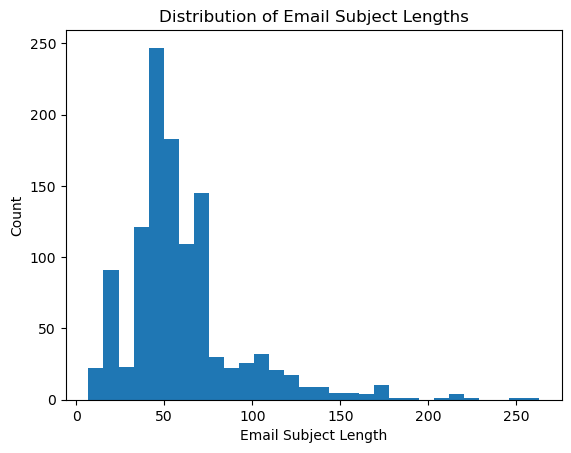

In [82]:
df['subject'] = df['subject'].astype(str) 
df['email_sub_length']=df['subject'].apply(len) 
plt.hist(df['email_sub_length'], bins=30) 
plt.xlabel('Email Subject Length') 
plt.ylabel('Count') 
plt.title('Distribution of Email Subject Lengths') 
plt.show()

# Count of emails sent by sender 

In [83]:
sender_counts = df['to'].value_counts() 
sender_counts 

to
abarnavasanth7243@gmail.com                   933
"V.ABARNA" <abarnavasanth7243@gmail.com>       87
<abarnavasanth7243@gmail.com>                  67
Abarna <abarnavasanth7243@gmail.com>           22
feedback@appypie.com                            8
ABARNA <abarnavasanth7243@gmail.com>            5
Abarnava <abarnavasanth7243@gmail.com>          2
to                                              1
pgac2020@pec.edu                                1
Twitter User <abarnavasanth7243@gmail.com>      1
Name: count, dtype: int64

#  Scatter Plot the email length and label

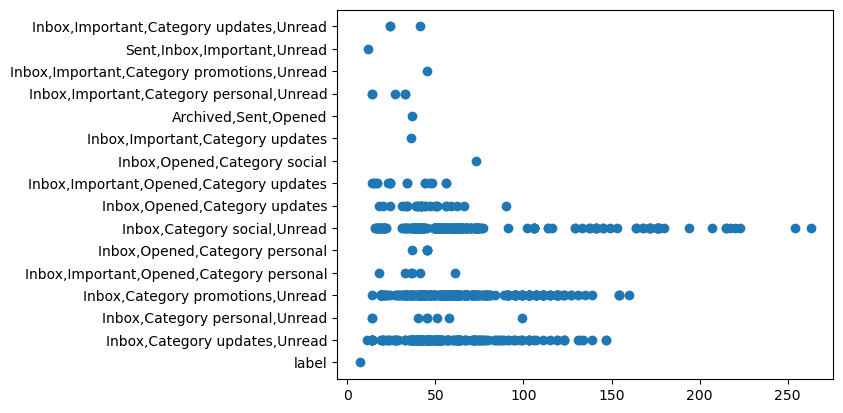

In [84]:
plt.scatter(df['email_sub_length'],df['label'])

# Resample data to visualize email count per day 
Assuming you have a 'timestamp' column representing the date and time of emails 

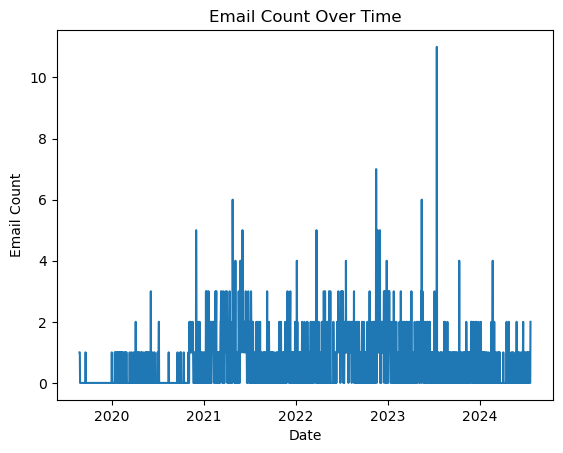

In [85]:
df['date']=pd.to_datetime(df['date']) 
df.set_index('date', inplace=True) 
emailcount = df.resample('D').size() 
plt.plot(emailcount) 
plt.xlabel('Date') 
plt.ylabel('Email Count') 
plt.title('Email Count Over Time') 
plt.show()

# Email Senders' Distribution: - Visualize the distribution of email senders to identify frequent contacts. 
Assuming you have a 'sender' column representing email senders

In [86]:
# Top 10 senders
sender_counts = df['to'].value_counts().head(10) 
sender_counts

to
abarnavasanth7243@gmail.com                   933
"V.ABARNA" <abarnavasanth7243@gmail.com>       87
<abarnavasanth7243@gmail.com>                  67
Abarna <abarnavasanth7243@gmail.com>           22
feedback@appypie.com                            8
ABARNA <abarnavasanth7243@gmail.com>            5
Abarnava <abarnavasanth7243@gmail.com>          2
to                                              1
pgac2020@pec.edu                                1
Twitter User <abarnavasanth7243@gmail.com>      1
Name: count, dtype: int64

# Plot the sender distribution

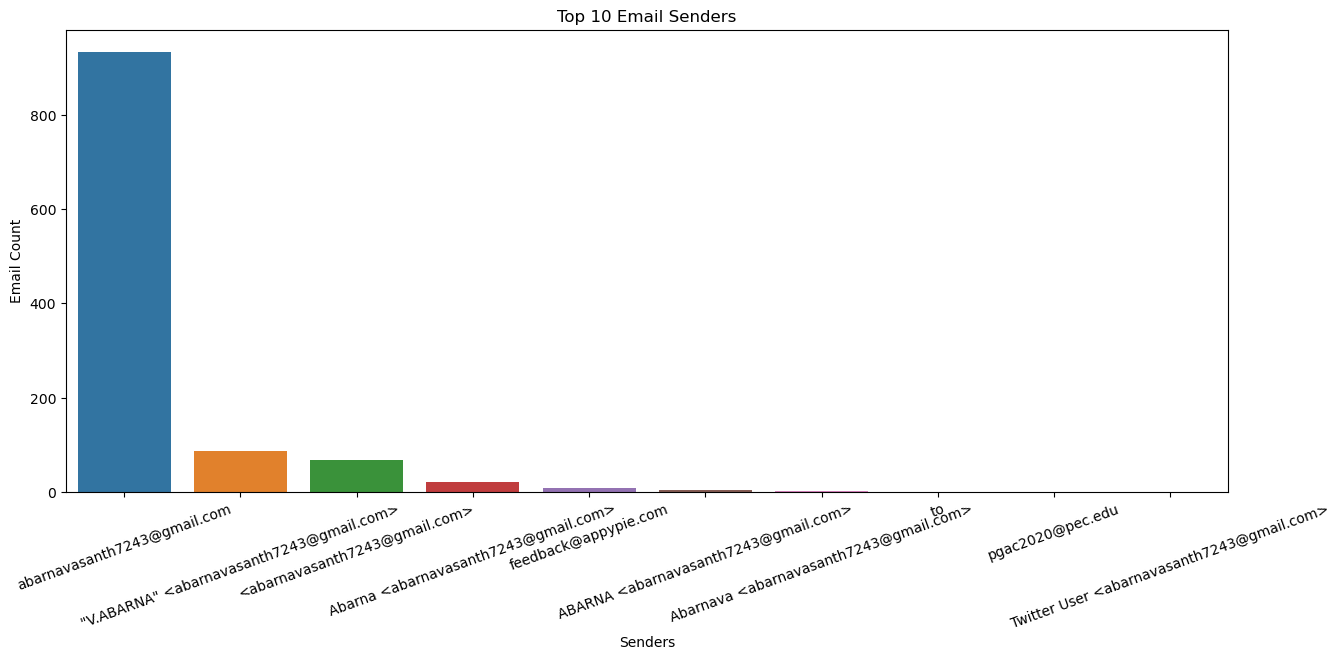

In [87]:
plt.figure(figsize=(15, 6)) 
sns.barplot(x=sender_counts.index, y=sender_counts.values) 
plt.xlabel('Senders') 
plt.ylabel('Email Count') 
plt.title('Top 10 Email Senders') 
plt.xticks(rotation=20) 
plt.show()

#  Word cloud for text data (if you have a column with text data) from wordcloud

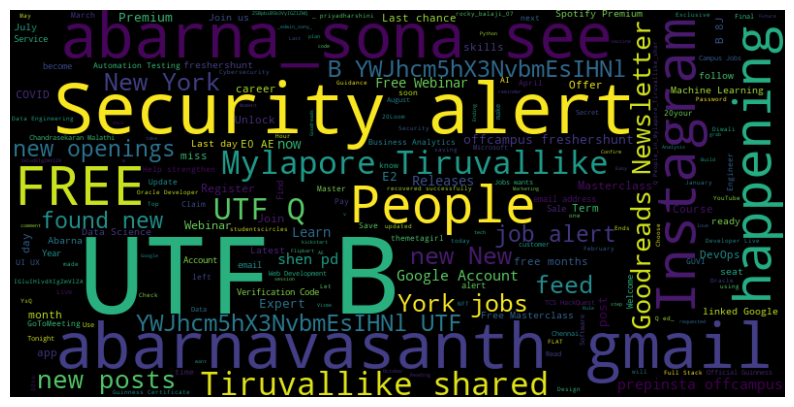

In [88]:
text_data = ' '.join(df['subject'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()